<a href="https://colab.research.google.com/github/itstusharsawhney/go/blob/master/Bolt_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Reading data
data=pd.read_csv("Testb.csv")

In [19]:
# Initial data inspection
print(data.info())


In [20]:
# Initial data inspection
print(data.describe())


In [5]:
# Calculate deviations
data['price_deviation'] = ((data['metered_price'] - data['upfront_price']).abs() / data['upfront_price']) * 100
data['distance_error'] = (data['distance'] - data['predicted_distance']).abs()
data['duration_error'] = (data['duration'] - data['predicted_duration']).abs()



In [6]:
# Checking if difference between mean and median is high
avg_deviation = data['price_deviation'].mean()
median_deviation = data['price_deviation'].median()


Mean deviation is : 31.91%
Median deviation is : 16.60%


In [24]:
# Checking to see the role of ditance and duration on average price discrepency
data['distance_bin'] = pd.cut(data['distance'], bins=[0, 5000, 10000, 20000, 50000, 100000, float('inf')],
                              labels=['<5km', '5-10km', '10-20km', '20-50km', '50-100km', '>100km'])
data['duration_bin'] = pd.cut(data['duration'], bins=[0, 600, 1200, 1800, 3600, float('inf')],
                              labels=['<10min', '10-20min', '20-30min', '30-60min', '>60min'])

distance_impact = data.groupby('distance_bin', observed=True)['price_deviation'].mean()
duration_impact = data.groupby('duration_bin', observed=True)['price_deviation'].mean()

duration_impact


,price_deviation
duration_bin,
<10min,19.103115
10-20min,23.429556
20-30min,27.099930
30-60min,55.819322
>60min,118.719739


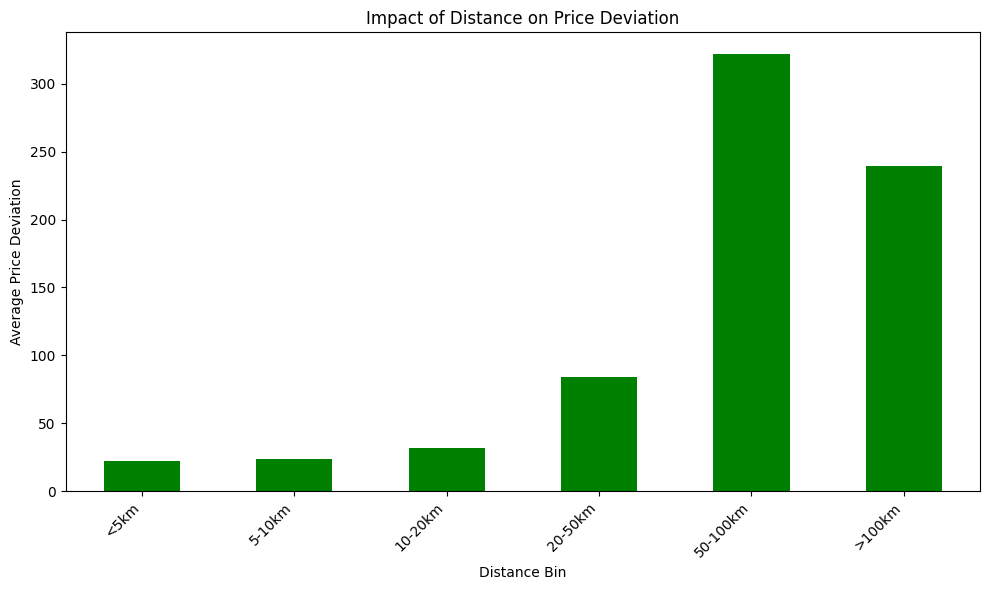

In [39]:
# Plot impact of distance on price deviation
plt.figure(figsize=(10, 6))
distance_impact.plot(kind='bar', color='green')
plt.title('Impact of Distance on Price Deviation')
plt.xlabel('Distance Bin')
plt.ylabel('Average Price Deviation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

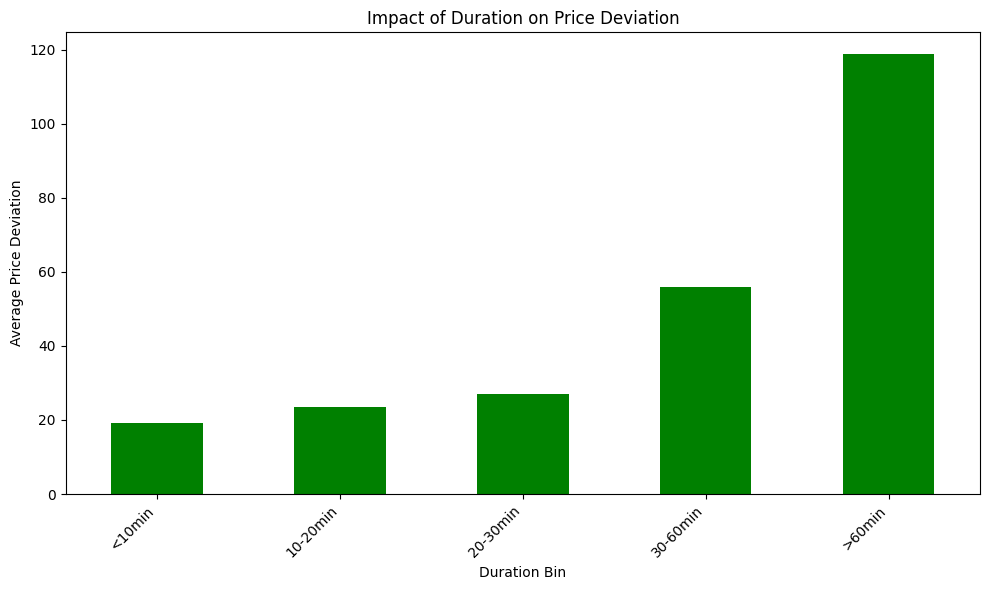

In [40]:
# Plot impact of distance on price deviation
plt.figure(figsize=(10, 6))
duration_impact.plot(kind='bar', color='green')
plt.title('Impact of Duration on Price Deviation')
plt.xlabel('Duration Bin')
plt.ylabel('Average Price Deviation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
# Analyze impact of GPS confidence and destination changes
gps_impact = data.groupby('gps_confidence')['price_deviation'].mean()

dest_change_impact = data.groupby('dest_change_number')['price_deviation'].mean()


gps_confidence
0    95.300911
1    24.145928
Name: price_deviation, dtype: float64
dest_change_number
1      31.040385
2      38.151477
3      64.505595
4     156.289365
5       2.790805
6            NaN
7      78.221525
9            NaN
12           NaN
Name: price_deviation, dtype: float64


In [ ]:
# Analyze impact of GPS confidence and destination changes
gps_impact = data.groupby('gps_confidence')['price_deviation'].mean()


In [ ]:
# Filter app versions with at least 100 rides and checking their respective average price deviations
filtered_data = data.groupby('rider_app_version').filter(lambda x: len(x) >= 100)
mean_price_deviation_by_app = filtered_data.groupby('rider_app_version')['price_deviation'].mean().reset_index()
mean_price_deviation_by_app_sorted = mean_price_deviation_by_app.sort_values(by='price_deviation', ascending=False)


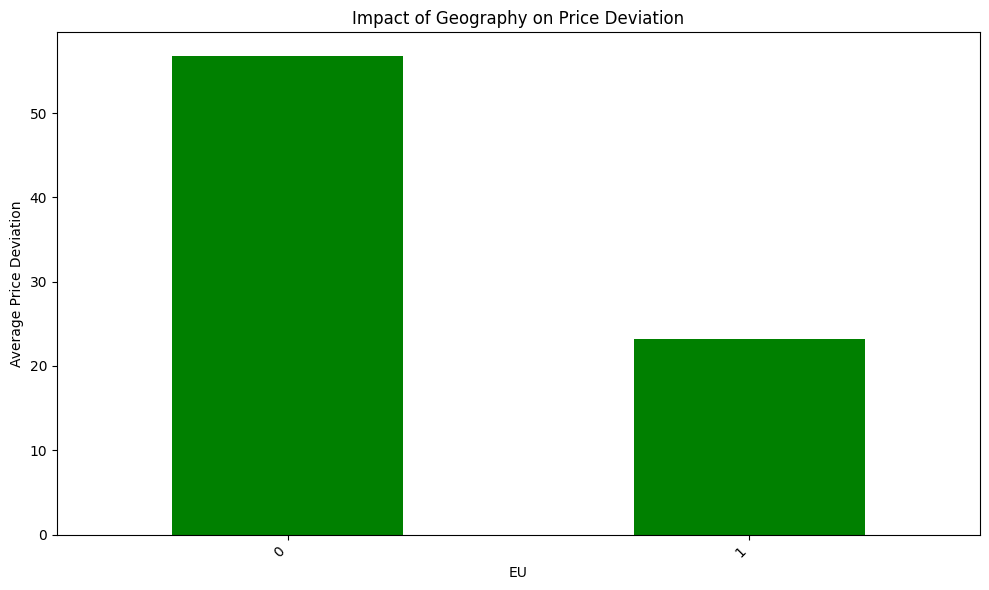

In [41]:
# EU vs Non-Eu rides and their price impact
eu_non_eu_impact = data.groupby('eu_indicator')['price_deviation'].mean()
eu_non_eu_impact


# Plot impact of geographical impact on price deviation
plt.figure(figsize=(10, 6))
eu_non_eu_impact.plot(kind='bar', color='green')
plt.title('Impact of Geography on Price Deviation')
plt.xlabel('EU')
plt.ylabel('Average Price Deviation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
# Filtering high deviation rides
high_deviation_data = data[data['price_deviation'] > 20]


In [46]:
# Group by distance and duration bins to see deviations with observed=True
high_deviation_data_distance_impact = high_deviation_data.groupby('distance_bin', observed=True)['price_deviation'].mean()
high_deviation_data_duration_impact = high_deviation_data.groupby('duration_bin', observed=True)['price_deviation'].mean()


In [47]:
# Analyze impact of GPS confidence and destination changes on high deviation data
high_variation_gps_impact = high_deviation_data.groupby('gps_confidence')['price_deviation'].mean()
high_variation_dest_change_impact = high_deviation_data.groupby('dest_change_number')['price_deviation'].mean()



In [33]:
# Filter app versions with at least 100 rides and checking their respective average price deviations
filtered_data = high_deviation_data.groupby('rider_app_version').filter(lambda x: len(x) >= 100)
mean_price_deviation_by_app = filtered_data.groupby('rider_app_version')['price_deviation'].mean().reset_index()
mean_price_deviation_by_app_sorted = mean_price_deviation_by_app.sort_values(by='price_deviation', ascending=True)
mean_price_deviation_by_app_sorted

,rider_app_version,price_deviation
4,CI.4.19,42.345674
2,CA.5.44,46.502896
1,CA.5.43,61.805510
3,CI.4.17,68.389182
0,CA.5.42,83.670919


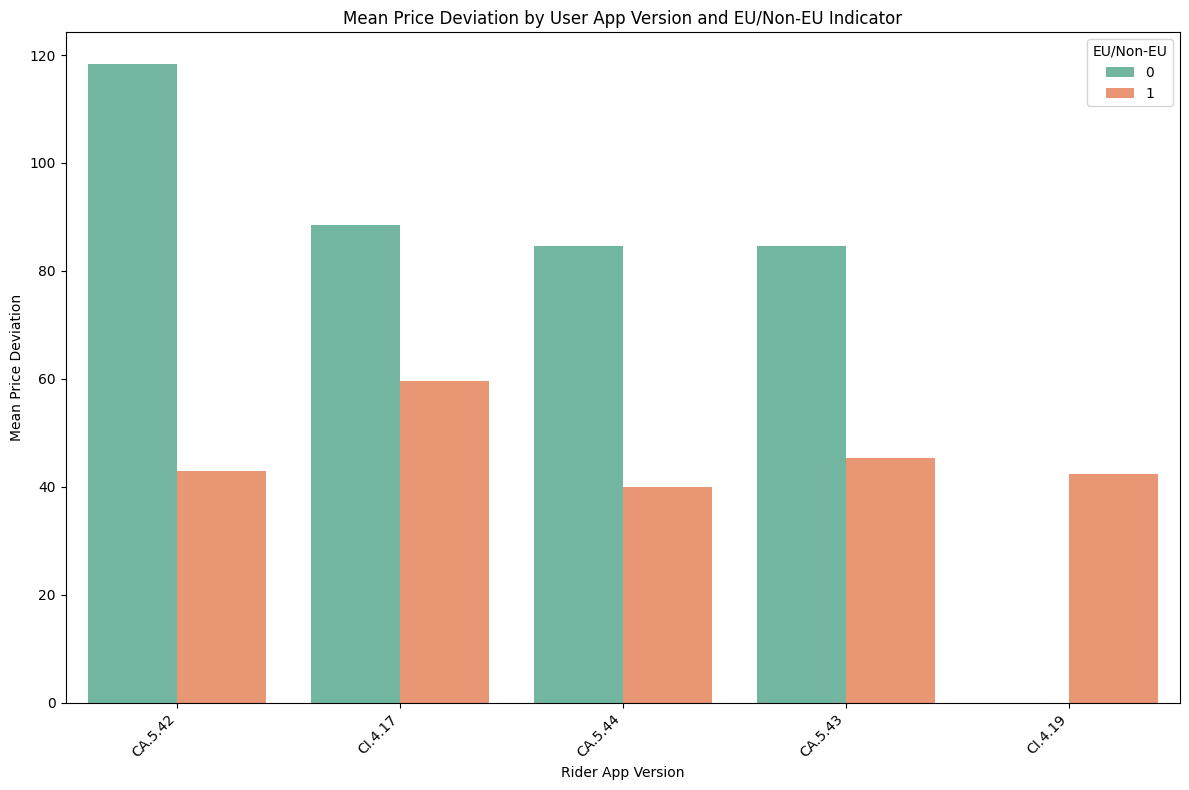

In [45]:
# Filter app versions with at least 100 rides
filtered_data = high_deviation_data.groupby('rider_app_version').filter(lambda x: len(x) >= 100)
mean_price_deviation_by_app = filtered_data.groupby(['rider_app_version', 'eu_indicator'])['price_deviation'].mean().reset_index()
ride_count_by_app = filtered_data.groupby(['rider_app_version', 'eu_indicator']).size().reset_index(name='count')
mean_price_deviation_with_count = pd.merge(mean_price_deviation_by_app, ride_count_by_app, on=['rider_app_version', 'eu_indicator'])
mean_price_deviation_with_count_sorted = mean_price_deviation_with_count.sort_values(by='price_deviation', ascending=False)

# Plot the mean price deviation by app version and EU/Non-EU indicator
plt.figure(figsize=(12, 8))
sns.barplot(data=mean_price_deviation_with_count_sorted.head(10), x='rider_app_version', y='price_deviation', hue='eu_indicator', palette='Set2')
plt.title('Mean Price Deviation by User App Version and EU/Non-EU Indicator')
plt.xlabel('Rider App Version')
plt.ylabel('Mean Price Deviation')
plt.xticks(rotation=45, ha='right')
plt.legend(title='EU/Non-EU', loc='upper right')
plt.tight_layout()
plt.show()


In [61]:
 # Checking if Duration Error or Distance Error causes more deviation

# Calculate correlation between price deviation and both errors
correlation_distance = data['price_deviation'].corr(data['distance_error'])
correlation_duration = data['price_deviation'].corr(data['duration_error'])

print(f"Correlation between Price Deviation and Distance Error: {correlation_distance:.2f}")
print(f"Correlation between Price Deviation and Duration Error: {correlation_duration:.2f}")

# Checking which error has a higher correlation
if abs(correlation_distance) > abs(correlation_duration):
    print("Distance error has a higher impact on price deviation.")
else:
    print("Duration error has a higher impact on price deviation.")

Correlation between Price Deviation and Distance Error: 0.49
Correlation between Price Deviation and Duration Error: 0.48
Distance error has a higher impact on price deviation.
